# **Regression in Machine Learning**

Regression in machine learning refers to a supervised learning technique where the goal is to predict a continuous numerical value based on one or more independent features. It finds relationships between variables so that predictions can be made. we have two types of variables present in regression:

Dependent Variable (Target): The variable we are trying to predict e.g house price.
Independent Variables (Features): The input variables that influence the prediction e.g locality, number of rooms.
Regression analysis problem works with if output variable is a real or continuous value such as “salary” or “weight”. Many different regression models can be used but the simplest model in them is linear regression.

##Applications of Regression

Predicting prices: Used to predict the price of a house based on its size, location and other features.

Forecasting trends: Model to forecast the sales of a product based on historical sales data.
Identifying risk factors: Used to identify risk factors for heart patient based on patient medical data.

Making decisions: It could be used to recommend which stock to buy based on market data.

## Advantages of Regression

Easy to understand and interpret.
Robust to outliers.
Can handle both linear relationships easily.

## Disadvantages of Regression
Assumes linearity.
Sensitive to situation where two or more independent variables are highly correlated with each other i.e multicollinearity.
May not be suitable for highly complex relationships.

# **CODE FOR REGRESSION**

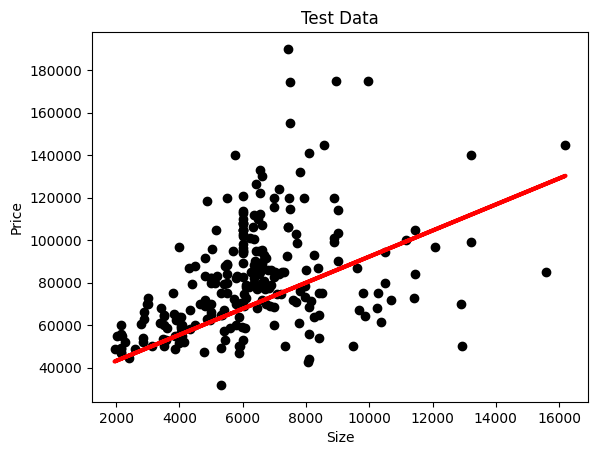

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Extract features and target variable
Y = df['price']
X = df['lotsize']

# Reshape for compatibility with scikit-learn
X = X.to_numpy().reshape(len(X), 1)
Y = Y.to_numpy().reshape(len(Y), 1)

# Split data into training and testing sets
X_train = X[:-250]
X_test = X[-250:]
Y_train = Y[:-250]
Y_test = Y[-250:]

# Plot the test data
plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
# Remove xticks and yticks for clarity in this example
# plt.xticks(())
# plt.yticks(())


# Train linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# Plot predictions
plt.plot(X_test, regr.predict(X_test), color='red', linewidth=3)
plt.show()

Here in this graph we plot the test data. The red line indicates the best fit line for predicting the price.

To make an individual prediction using the linear regression model:

print("Predicted price for a lot size of 5000: " + str(round(regr.predict([[5000]])[0][0])))

# FULL EXPLANATION OF CODE

import matplotlib.pyplot as plt

Imports the pyplot module from Matplotlib and gives it the name plt. You use plt to create figures, plots, labels and show the chart.

import numpy as np

Imports NumPy (numerical library) as np. It’s used for array operations and will be helpful if you need to reshape, sort, or do numeric ops. (In this script it’s not heavily used, but is commonly imported.)

from sklearn import datasets, linear_model

Imports datasets and linear_model from scikit-learn. linear_model is used later to create a LinearRegression object.

Note: datasets is imported but not used in this code — you can remove it.

import pandas as pd

Imports pandas as pd. You use this to read the CSV into a DataFrame and manipulate tabular data.

(blank line)

Improves readability.

# Load dataset

Comment describing the next action.

df = pd.read_csv("Housing.csv")

Reads the CSV file "Housing.csv" from the current working directory into a pandas DataFrame called df.

Gotcha: If the file is not in the current directory you’ll get FileNotFoundError. Use the full path or change working directory.

(blank line)

# Extract features and target variable

Comment describing feature/target extraction.

Y = df['price']

Selects the price column from the DataFrame. Y is a pandas Series containing target values (house prices).

X = df['lotsize']

Selects the lotsize column (the single input feature) as a Series.

(blank line)

# Reshape for compatibility with scikit-learn

Comment: scikit-learn expects X to be 2-D (n_samples, n_features). This explains the next two lines.

X = X.to_numpy().reshape(len(X), 1)

Converts X to a NumPy array and reshapes it to shape (n_samples, 1) so it’s a 2D column vector. Example: if you had 1000 rows, shape becomes (1000, 1).

Y = Y.to_numpy().reshape(len(Y), 1)

Converts Y to a NumPy array and reshapes to (n_samples, 1) (column vector).

Note: scikit-learn accepts y as either 1-D shape (n_samples,) or 2-D shape (n_samples, n_targets). For a single target many people prefer Y.ravel() or Y.reshape(-1,) to get a 1-D array — but a (n_samples,1) shape also works because it treats it as a single-output problem.

(blank line)

# Split data into training and testing sets

Comment describing the manual split that follows.

X_train = X[:-250]

Takes all rows of X except the last 250 as the training set. This uses Python negative indexing: [:-250] means indices from start up to (but not including) len(X)-250.

X_test = X[-250:]

Takes the last 250 rows of X for testing.

Y_train = Y[:-250]

Training targets corresponding to X_train.

Y_test = Y[-250:]

Test targets corresponding to X_test.

Gotchas & suggestions:

This is a deterministic, not randomized split. If the rows are ordered (time series or sorted by lotsize), the last 250 may not be representative. Prefer sklearn.model_selection.train_test_split for random splitting, e.g. train_test_split(X, Y, test_size=250, random_state=42).

If your dataset has fewer than 250 rows, these slices will produce empty arrays or unexpected results — check len(X) first.

(blank line)

# Plot the test data

Comment describing the plot that follows.

plt.scatter(X_test, Y_test, color='black')

Draws a scatter plot of test samples: lotsize vs price. Points are plotted in black. Both X_test and Y_test are 2D column arrays but matplotlib will accept them (it flattens internally).

Tip: You can call .ravel() to flatten explicitly: plt.scatter(X_test.ravel(), Y_test.ravel()).

plt.title('Test Data')

Adds the plot title.

plt.xlabel('Size')

Labels the x-axis “Size”.

plt.ylabel('Price')

Labels the y-axis “Price”.

# Remove xticks and yticks for clarity in this example

# plt.xticks(())

# plt.yticks(())

These lines are commented out. If you uncomment them, they remove tick labels from the axes (useful for very minimal plots). Right now they do nothing.

(blank line)

(blank line)

# Train linear regression model

Comment before model creation and fitting.

regr = linear_model.LinearRegression()

Creates an instance of scikit-learn’s ordinary least squares linear regression. Default parameters: fit_intercept=True (it will learn an intercept), etc.

regr.fit(X_train, Y_train)

Fits the linear model to the training data. This computes the best-fit slope(s) and intercept. After this call you can access regr.coef_, regr.intercept_, and regr.predict(...).

Note: If Y_train is 2D (n_samples,1), coef_ may have shape (1, 1). If you want a 1-D y shape use .ravel() when fitting: regr.fit(X_train, Y_train.ravel()).

(blank line)

# Plot predictions

Comment describing plotting of the model’s predictions.

plt.plot(X_test, regr.predict(X_test), color='red', linewidth=3)

Plots the predicted values for the test X_test as a connected red line. Important plotting detail: plt.plot connects points in the order they appear in X_test. If X_test is not sorted by lotsize, the line will zig-zag between points and look messy. To plot a proper regression line, sort X_test (and corresponding predictions) first:

idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx], regr.predict(X_test).ravel()[idx], linewidth=3)


If you want a simple straight line across the entire range, compute predictions on a sorted grid: X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1) and then plt.plot(X_line, regr.predict(X_line)).

plt.show()

Displays the figure window (or inline figure if using Jupyter Notebook). This renders the scatter and prediction line you added.